In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import anndata as ad
import scanpy as sc
from PIL import Image
import tifffile as tifi
from IPython.display import IFrame
import squidpy as sq

**Original Data**

In [2]:
adata = sc.read_10x_h5("../Data/square_008um/filtered_feature_bc_matrix.h5")
adata.var_names_make_unique()
umi_counts = adata.to_df()
umi_counts

/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


SAMD11  NOC2L  KLHL17  PLEKHN1  PERM1  HES4  ISG15  \
s_008um_00301_00321-1     0.0    0.0     0.0      0.0    0.0   0.0    0.0   
s_008um_00602_00290-1     0.0    0.0     0.0      0.0    0.0   0.0    0.0   
s_008um_00515_00112-1     0.0    0.0     0.0      0.0    0.0   0.0    0.0   
s_008um_00526_00291-1     0.0    0.0     0.0      0.0    0.0   0.0    0.0   
s_008um_00681_00396-1     0.0    0.0     0.0      0.0    0.0   0.0    0.0   
...                       ...    ...     ...      ...    ...   ...    ...   
s_008um_00653_00166-1     0.0    0.0     0.0      0.0    0.0   0.0    0.0   
s_008um_00353_00477-1     0.0    0.0     0.0      0.0    0.0   0.0    0.0   
s_008um_00797_00672-1     0.0    0.0     0.0      0.0    0.0   0.0    0.0   
s_008um_00565_00244-1     0.0    0.0     0.0      0.0    0.0   0.0    0.0   
s_008um_00373_00222-1     0.0    0.0     0.0      0.0    0.0   0.0    0.0   

                       AGRN  RNF223  C1orf159  ...  MT-ND2  MT-CO2  MT-ATP6  \
s_008um_00301_00321-1   0.0     0.0       0.0  ...     0.0     0.0      1.0   
s_008um_00602_00290-1   0.0     0.0       0.0  ...     0.0     0.0      0.0   
s_008um_00515_00112-1   0.0     0.0       0.0  ...     0.0     0.0      0.0   
s_008um_00526_00291-1   0.0     0.0       0.0  ...     0.0     1.0      0.0   
s_008um_00681_00396-1   0.0     0.0       0.0  ...     0.0     0.0      0.0   
...                     ...     ...       ...  ...     ...     ...      ...   
s_008um_00653_00166-1   0.0     0.0       0.0  ...     1.0     0.0      0.0   
s_008um_00353_00477-1   0.0     0.0       0.0  ...     0.0     0.0      0.0   
s_008um_00797_00672-1   0.0     0.0       0.0  ...     0.0     0.0      0.0   
s_008um_00565_00244-1   0.0     0.0       0.0  ...     0.0     0.0      0.0   
s_008um_00373_00222-1   0.0     0.0       0.0  ...     0.0     0.0      0.0   

                       MT-CO3  MT-ND3  MT-ND4L  MT-ND4  MT-ND5  MT-ND6  MT-CYB  
s_008um_00301_00321-1     1.0     0.0      2.0     0.0     0.0     0.0     0.0  
s_008um_00602_00290-1     0.0     0.0      0.0     1.0     0.0     0.0     0.0  
s_008um_00515_00112-1     1.0     0.0      0.0     1.0     0.0     0.0     0.0  
s_008um_00526_00291-1     0.0     0.0      1.0     0.0     0.0     0.0     0.0  
s_008um_00681_00396-1     0.0     0.0      1.0     0.0     0.0     0.0     0.0  
...                       ...     ...      ...     ...     ...     ...     ...  
s_008um_00653_00166-1     0.0     0.0      0.0     0.0     0.0     0.0     0.0  
s_008um_00353_00477-1     0.0     0.0      1.0     0.0     0.0     0.0     0.0  
s_008um_00797_00672-1     0.0     0.0      0.0     0.0     0.0     0.0     0.0  
s_008um_00565_00244-1     0.0     0.0      0.0     0.0     0.0     0.0     0.0  
s_008um_00373_00222-1     0.0     1.0      1.0     0.0     1.0     1.0     0.0  

[310118 rows x 18085 columns]

**Processed Data**

In [2]:
# Anndata object path
cells_adata_path = "../Data/skin_TXK6Z4X_A1_processed/tmap/weighted_by_area|celltypist_cells_adata.h5"

# Cropped whole slide image
wsi_path = "../Data/skin_TXK6Z4X_A1_processed/tmap/wsi.tif"

# Cell boundaries image
cells_layer_path = "../Data/skin_TXK6Z4X_A1_processed/cells_layer.png"

In [3]:
adata = sc.read_h5ad(cells_adata_path)

In [4]:
adata.obs

cell_type       patch_id
id                                     
ID_1        cd19+cd20+ b  patch_0_0.csv
ID_10       cd19+cd20+ b  patch_0_0.csv
ID_100      cd19+cd20+ b  patch_0_0.csv
ID_1000             cms2  patch_0_0.csv
ID_1001             cms2  patch_0_0.csv
...                  ...            ...
ID_81072       stromal 1  patch_1_1.csv
ID_81078  myofibroblasts  patch_1_1.csv
ID_81096  myofibroblasts  patch_1_1.csv
ID_81115  myofibroblasts  patch_1_1.csv
ID_81131       stromal 1  patch_1_1.csv

[101835 rows x 2 columns]

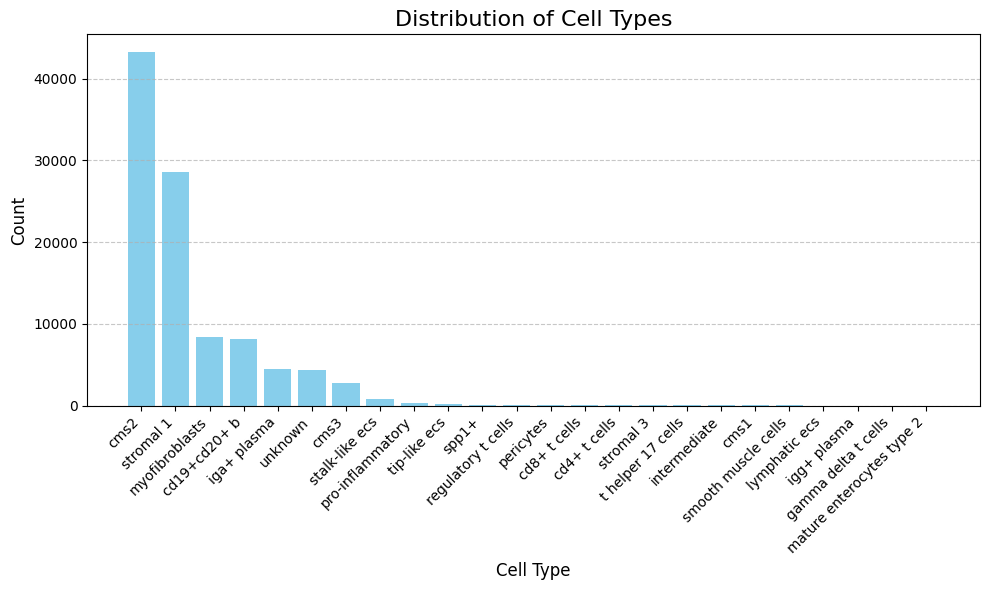

In [5]:
cell_type_counts = adata.obs["cell_type"].value_counts().reset_index()
cell_type_counts.columns = ["Cell Type", "Count"]

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(cell_type_counts["Cell Type"], cell_type_counts["Count"], color='skyblue')
plt.title("Distribution of Cell Types", fontsize=16)
plt.xlabel("Cell Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**Plotting Cell Stastics**

In [6]:
adata.obsm["stats"]

num_shared_bins  num_unique_bins  num_transcripts
id                                                         
ID_1                   24               12                3
ID_10                   6               80               13
ID_100                 23               26                6
ID_1000                22                6                0
ID_1001                21               16                0
...                   ...              ...              ...
ID_81072               28               14                5
ID_81078               22                9                9
ID_81096               12               25               10
ID_81115                7               42                1
ID_81131               26               22               57

[101835 rows x 3 columns]

**Plotting number of shared bins per cell, number of unique bins per cell, and number of transcripts per cell.**

*Note: In the figures below, each dot is a cell*

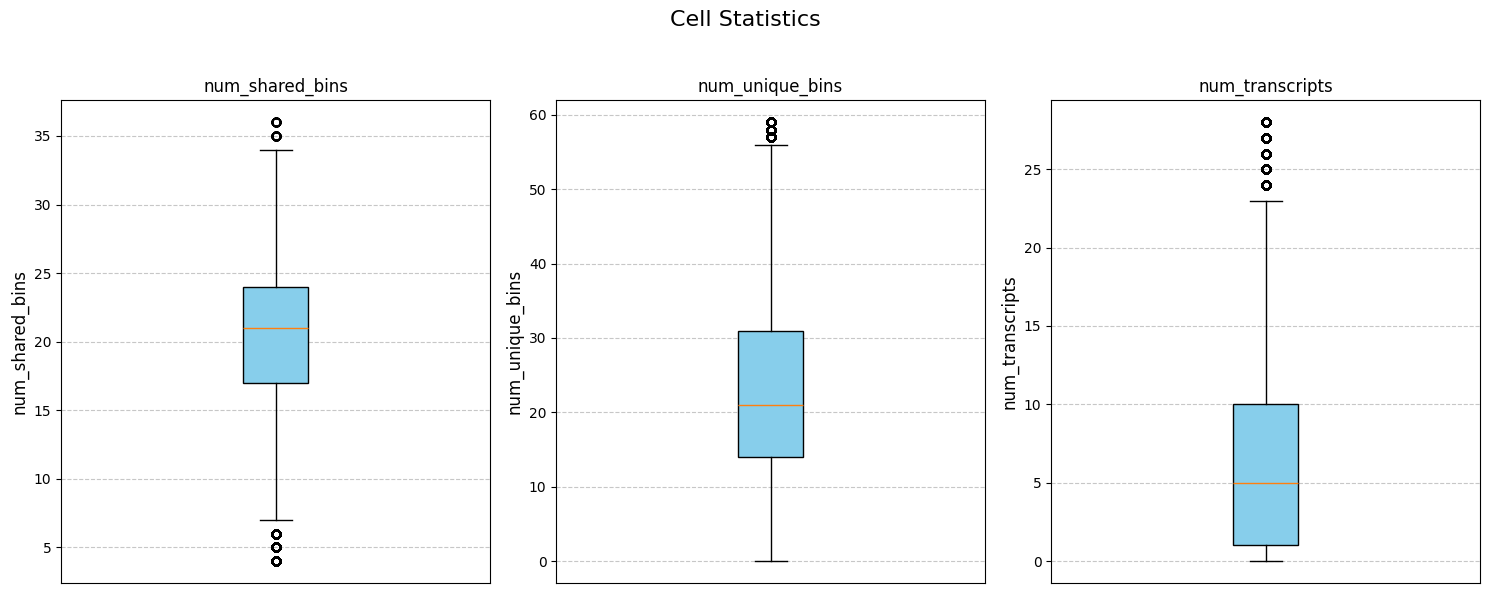

In [7]:
# Extract the stats DataFrame from adata
stats_df = adata.obsm["stats"]

# Function to remove outliers using IQR
def remove_outliers(series):
    q1 = series.quantile(0.25)  # First quartile (25th percentile)
    q3 = series.quantile(0.75)  # Third quartile (75th percentile)
    iqr = q3 - q1  # Interquartile range
    lower_bound = q1 - 1.5 * iqr  # Lower bound
    upper_bound = q3 + 1.5 * iqr  # Upper bound
    return series[(series >= lower_bound) & (series <= upper_bound)]

# Remove outliers from the DataFrame
filtered_stats_df = stats_df.apply(remove_outliers)

# Create subplots: one subplot for each column
num_columns = len(filtered_stats_df.columns)
fig, axes = plt.subplots(1, num_columns, figsize=(15, 6), sharey=False)
for i, column in enumerate(filtered_stats_df.columns):
    axes[i].boxplot(filtered_stats_df[column].dropna(), patch_artist=True, boxprops=dict(facecolor="skyblue"))
    axes[i].set_title(column, fontsize=12)
    axes[i].set_xticks([])
    axes[i].grid(axis="y", linestyle="--", alpha=0.7)
    axes[i].set_ylabel(column, fontsize=12)
fig.suptitle("Cell Statistics", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the title


# Show the plot
plt.show()

**Getting Cell Coorinates**

In [8]:
adata.obsm["spatial"]

cell_x  cell_y
id                      
ID_1        3526    3780
ID_10       3146    3938
ID_100      3756    3707
ID_1000     2756    3433
ID_1001     2942    3566
...          ...     ...
ID_81072    7570    7403
ID_81078    7905    7592
ID_81096    7450    7731
ID_81115    7768    7904
ID_81131    7531    7657

[101835 rows x 2 columns]

**Plotting the top-n expressed genes**

Plotting the top-n genes by count (summed across all cells)

*Note: ENACT only keeps the top-k highly variable genes in the AnnData object if params>use_hvg is set to True.*

Number of unique genes in the sample: 1084


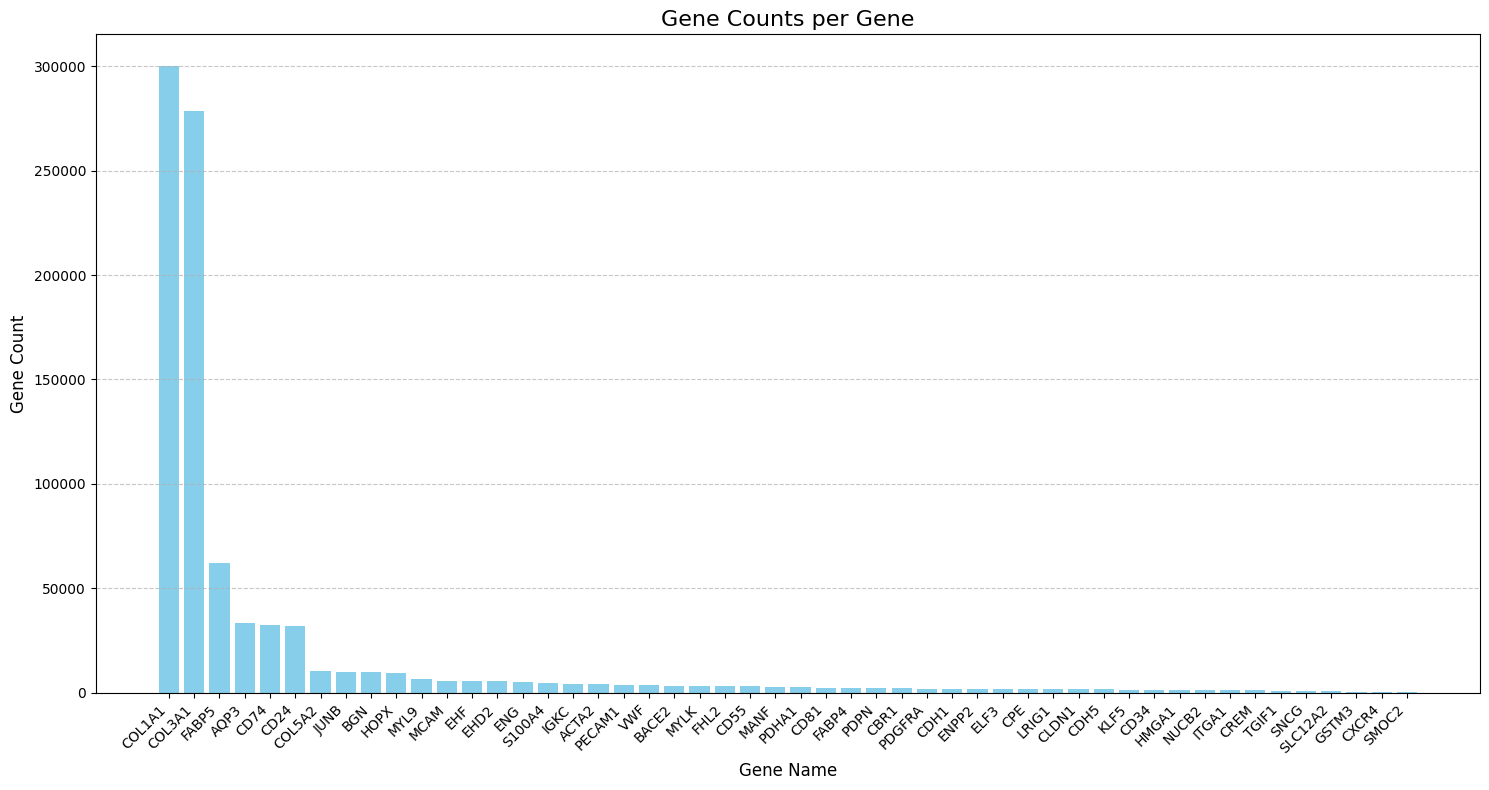

In [9]:
top_n = 50  # Adjust the number of genes to display

# Compute gene counts
counts_per_gene = (
    pd.DataFrame({"Gene Name": adata.var_names, "Gene Count": adata.X.sum(axis=0)})
    .sort_values(by="Gene Count", ascending=False)
)
print(f"Number of unique genes in the sample: {len(counts_per_gene)}")

# Select the top N genes
top_genes = counts_per_gene[:top_n]

# Create the plot
plt.figure(figsize=(15, 8))
plt.bar(top_genes["Gene Name"], top_genes["Gene Count"], color="skyblue")
plt.title("Gene Counts per Gene", fontsize=16)
plt.xlabel("Gene Name", fontsize=12)
plt.ylabel("Gene Count", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**Visualizing cell types over the image**

Patch bounds: x_min, x_max, y_min, y_max = (5000, 6000, 5000, 6000)


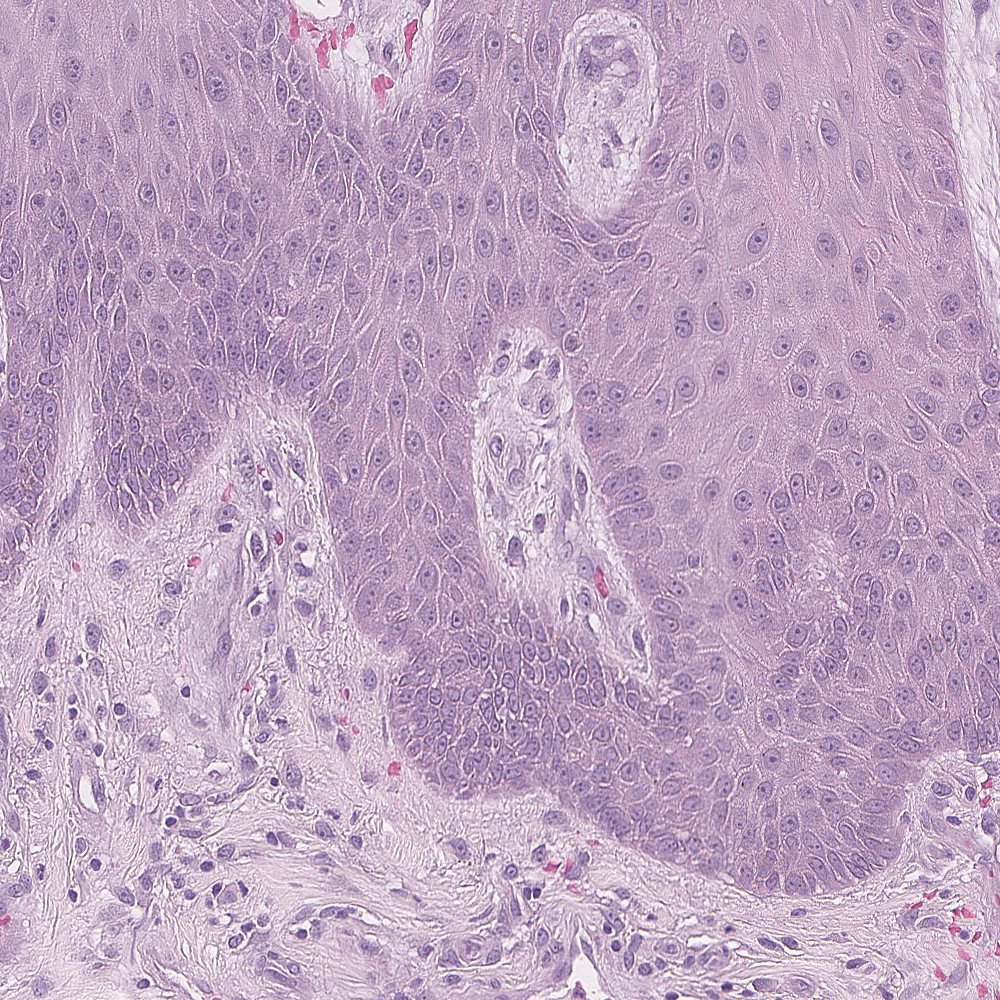

In [10]:
x_start, y_start = 5000, 5000  # Top-left corner of the patch
patch_size = 1000 # Specify the patch size

Image.MAX_IMAGE_PIXELS = None
wsi_img = tifi.imread(wsi_path)
cells_layer = np.array(Image.open(cells_layer_path))
x_min, x_max, y_min, y_max = (x_start, x_start + patch_size, y_start, y_start + patch_size)
patch = wsi_img[y_min:y_max, x_min:x_max]
patch_boundaries = cells_layer[y_min:y_max, x_min:x_max]
# Convert the NumPy array to a PIL Image
patch_image = Image.fromarray(patch)
print(f"Patch bounds: x_min, x_max, y_min, y_max = {x_min, x_max, y_min, y_max}")
patch_image

**Get the cells within a patch and represent their coordinates in the patch frame of reference.**

In [11]:
patch_adata = adata[
    adata.obsm["spatial"].cell_x.between(x_min, x_max) & 
    adata.obsm["spatial"].cell_y.between(y_min, y_max)
    ]
patch_cell_coords = patch_adata.obsm["spatial"]
print (f"Number of cells in patch: {patch_cell_coords.shape[0]}")

# Adjust coordinates relative to the patch
patch_cell_coords_df = patch_cell_coords.copy()
patch_cell_coords_df["cell_x_relative"] = patch_cell_coords_df["cell_x"] - x_start
patch_cell_coords_df["cell_y_relative"] = patch_cell_coords_df["cell_y"] - y_start
patch_cell_coords_df["cell_type"] = patch_adata.obs["cell_type"]
patch_cell_coords_df

Number of cells in patch: 1719


cell_x  cell_y  cell_x_relative  cell_y_relative    cell_type
id                                                                     
ID_23791    5743    5500              743              500  iga+ plasma
ID_23792    5860    5362              860              362  iga+ plasma
ID_23793    5685    5386              685              386         cms2
ID_23795    5780    5500              780              500         cms2
ID_23799    5950    5305              950              305  iga+ plasma
...          ...     ...              ...              ...          ...
ID_36262    5273    5748              273              748      unknown
ID_36278    5140    5600              140              600    stromal 1
ID_36281    5877    5011              877               11         cms2
ID_36287    5434    5956              434              956         cms2
ID_36301    5236    5804              236              804    stromal 1

[1719 rows x 5 columns]

**Neighborhood Enrichment Analysis**

/Users/siyuanzhao/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/squidpy/gr/_utils.py:203: ImplicitModificationWarning: Setting element `.obsp['spatial_connectivities']` of view, initializing view as actual.
  obj[key] = data


  0%|          | 0/1000 [00:00<?, ?/s]

/Users/siyuanzhao/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/squidpy/gr/_nhood.py:202: RuntimeWarning: invalid value encountered in divide
  zscore = (count - perms.mean(axis=0)) / perms.std(axis=0)


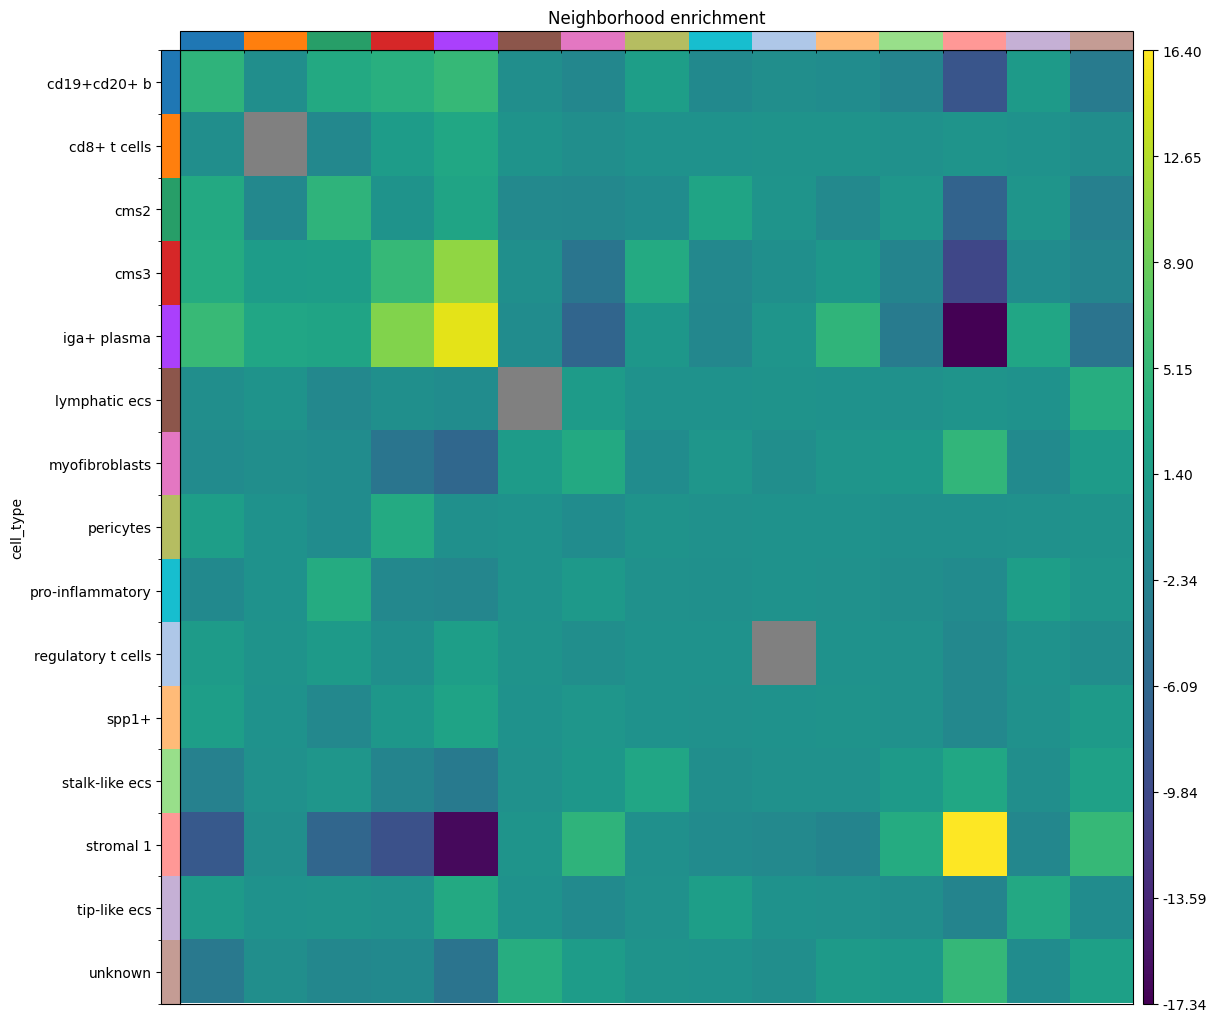

In [12]:
def run_neighborhood_enrichment(adata):
    """Sample function to run Squidpy operations on AnnData object

    Args:
        adata (_type_): _description_

    Returns:
        _type_: _description_
    """
    sq.gr.spatial_neighbors(adata)
    sq.gr.nhood_enrichment(adata, cluster_key="cell_type")
    return adata

# Reference documentation: https://squidpy.readthedocs.io/en/stable/api/squidpy.pl.nhood_enrichment.html
run_neighborhood_enrichment(patch_adata)
sq.pl.nhood_enrichment(patch_adata, cluster_key="cell_type")